<div class="frontmatter text-center">
<h1>Geospatial Data Science</h1>
<h2>Lecture 1: Introduction and Geometric objects</h2>
<h3>IT University of Copenhagen, Spring 2022</h3>
<h3>Instructor: Michael Szell</h3>
</div>

# Source
This notebook was adapted from:
* Analyze Geospatial Data in Python: GeoPandas and Shapely: https://www.learndatasci.com/tutorials/geospatial-data-python-geopandas-shapely/
* Automating GIS-Processes: https://autogis-site.readthedocs.io/en/latest/notebooks/L1/geometric-objects.html

# Imports

In [2]:
import geopandas as gpd # for data handling - ignore for now, will introduce properly in next lecture
import contextily as ctx # for data plotting - ignore for now, will introduce properly in next lecture

# John Snow and the 1854 cholera outbreak

Let's explore all the data first:

In [ ]:
!ls files/SnowGIS/

There are:
- [shapefiles](https://en.wikipedia.org/wiki/Shapefile) - 它们通常是包含地理空间矢量数据的一组文件，具有相同的名称和扩展名，如 .shp、.shx .dbf。在这里，我们只关心包含几何特征的.shp文件。
<img src="files/shapememe.jpg" width="400">

- 光栅图像raster image in [tif format](https://en.wikipedia.org/wiki/TIFF)

<img src="files/rastervector.jpg">

## 加载数据并确保坐标参考系 （CRS） 的一致性

加载数据 - deaths and water pumps:

In [3]:
deaths_df = gpd.read_file('files/SnowGIS/Cholera_Deaths.shp')
pumps_df = gpd.read_file('files/SnowGIS/Pumps.shp')

In [3]:
deaths_df.head()

,Id,Count,geometry
0,0,3,POINT (529308.741 181031.352)
1,0,2,POINT (529312.164 181025.172)
2,0,1,POINT (529314.382 181020.294)
3,0,1,POINT (529317.380 181014.259)
4,0,4,POINT (529320.675 181007.872)


In [4]:
type(deaths_df)

geopandas.geodataframe.GeoDataFrame

我们可以看到发生了多少人死亡以及在哪里发生。它们是点，并且有一个 x 和一个 y 坐标。它们是什么？shape文件的 CRS 告诉我们：

In [5]:
deaths_df.crs

<Projected CRS: EPSG:27700>
Name: OSGB 1936 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: UK - Britain and UKCS 49°46'N to 61°01'N, 7°33'W to 3°33'E
- bounds: (-9.2, 49.75, 2.88, 61.14)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: OSGB 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

<table><tr><td><img src="files/osgb36_01.png" width=300><td><img src="files/osgb36_02.png" width=300>

坐标参考系 （CRS） 处理坐标：球体上的坐标如何投影到平面上？

球体坐标为经度和纬度。但是我们的地图是平面的，而不是球体，所以我们必须投影。要进行GDS，您必须熟悉以下术语：  
https://en.wikipedia.org/wiki/Longitude  
https://en.wikipedia.org/wiki/Latitude  
https://en.wikipedia.org/wiki/Prime_meridian  
https://en.wikipedia.org/wiki/Map_projection  
https://en.wikipedia.org/wiki/Earth_radius  
https://en.wikipedia.org/wiki/Geoid  
https://en.wikipedia.org/wiki/Spatial_reference_system  
https://en.wikipedia.org/wiki/World_Geodetic_System  
https://en.wikipedia.org/wiki/Grid_reference_system  
https://en.wikipedia.org/wiki/Georeferencing


In [6]:
pumps_df

,Id,geometry
0,0,POINT (529396.539 181025.063)
1,0,POINT (529192.538 181079.391)
2,0,POINT (529183.740 181193.735)
3,0,POINT (529748.911 180924.207)
4,0,POINT (529613.205 180896.804)
5,0,POINT (529453.586 180826.353)
6,0,POINT (529593.727 180660.455)
7,0,POINT (529296.104 180794.849)


它必须具有相同的 CRS，否则两个数据源将不匹配！

每个CRS都有一个标准化代码，即EPSG代码: https://epsg.io/  

In [7]:
pumps_df.crs.to_epsg()

27700

In [8]:
pumps_df.crs.to_epsg() == deaths_df.crs.to_epsg()

True

## 画出数据

Ploting deaths:

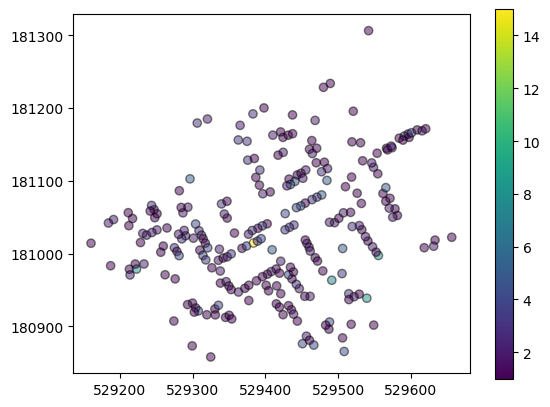

In [9]:
ax = deaths_df.plot(column='Count', alpha=0.5, edgecolor='k', legend=True)

使图更大并且加上 pumps数据:

<AxesSubplot:>

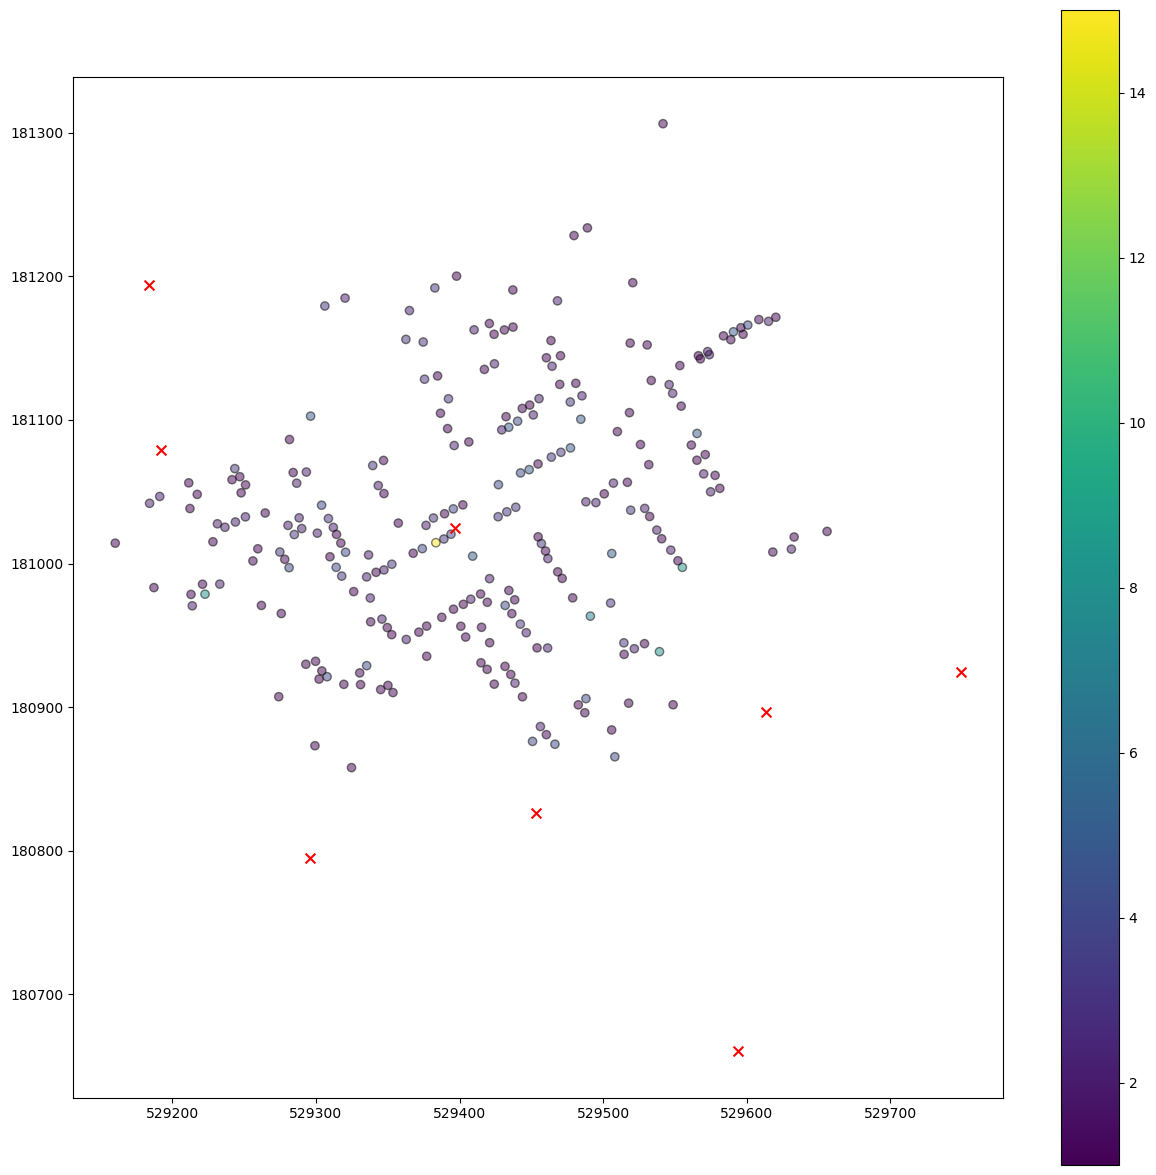

In [10]:
ax = deaths_df.plot(column='Count', figsize=(15, 15), alpha=0.5, edgecolor='k', legend=True)
pumps_df.plot(ax=ax, marker='x', color='red', markersize=50)

增加底图

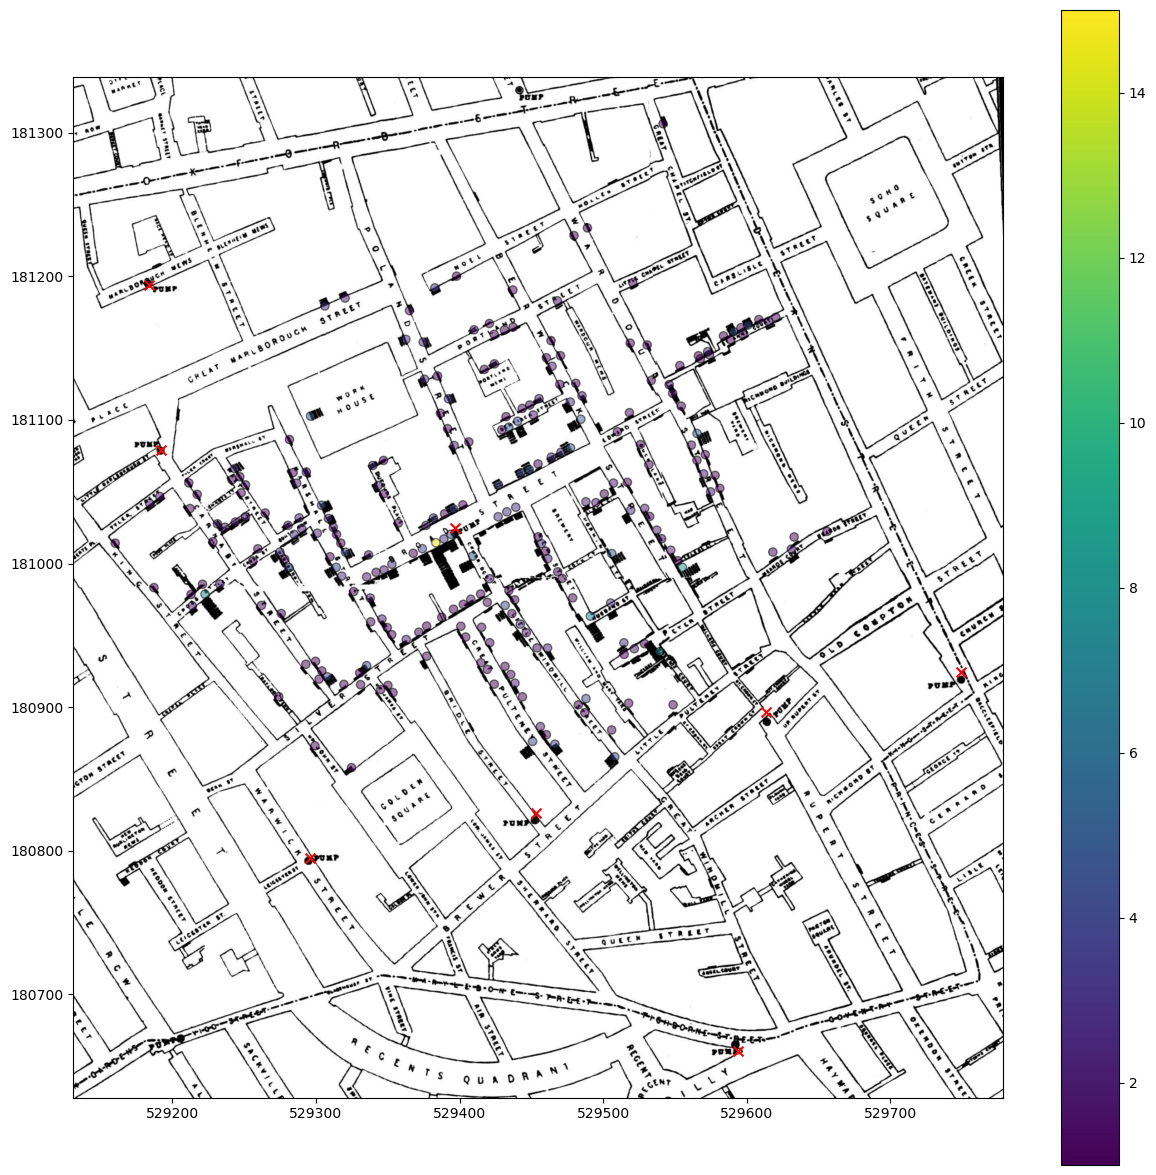

In [11]:
ax = deaths_df.plot(column='Count', figsize=(15, 15), alpha=0.5, edgecolor='k', legend=True)
pumps_df.plot(ax=ax, marker='x', color='red', markersize=50);

ctx.add_basemap(ax,
    crs=deaths_df.crs.to_string(),
    # Using the original map, hand-drawn by Snow
    source="files/SnowGIS/SnowMap.tif"
)

# Shapely and geometric objects

在本课中，您将学习如何创建和操作几何图形，通过 [Shapely Python Package](https://shapely.readthedocs.io/en/stable/manual.html).

**Sources:**

These materials are partly based on [Shapely-documentation](https://shapely.readthedocs.io/en/stable/manual.html) and [Westra
E. (2013), Chapter 3](https://www.packtpub.com/application-development/python-geospatial-development-second-edition).

## 基本几何对象

![Spatial geometric objects](files/geo-points-verts-polys.width-1200.jpg)

## Shapely spatial data model

![Spatial data model](files/SpatialDataModel.png)

*Fundamental geometric objects that can be used in Python with* [Shapely](https://shapely.readthedocs.io/en/stable/manual.html).

最基本的几何对象是`点`、`线`和`多边形`，它们是处理矢量格式空间数据时的基本要素。Python有一个名为[Shapely](https://shapely.readthedocs.io/en/stable/manual.html)的特定模块，用于执行各种几何操作。使用Shapely的基本知识是理解GeoPandas中几何图形存储和处理方式的基础。

**几何对象由坐标元组组成，其中:**

-  `Point` -对象表示空间中的单个点。点可以是二维 （x， y） 或三维 （x， y， z）.
-  `LineString` -对象（即一条线）表示连接在一起形成一条线的一系列点。因此，一条线由至少两个坐标元组的列表组成
-  `Polygon` -Object 表示一个填充区域，该区域由至少三个形成外环的坐标元组的列表和一个（可能的）孔多边形列表组成。

**也可以有一个几何对象的集合（例如具有多个部分的多边形）：**

-  `MultiPoint` -object 表示点的集合，由坐标元组列表组成
-  `MultiLineString` -object 表示行的集合，由类似行的序列列表组成
-  `MultiPolygon` -Object 表示多边形的集合，该集合由从外环和（可能的）孔列表元组构造的类似多边形的序列列表组成

**Shapely 中有用的属性和方法包括：**

-  基于点对象的集合创建线和面.
-  计算输入几何的面积/长度/边界等
-  根据输入几何进行几何运算例如 `union`, `difference`, `distance`
-  在几何之间执行空间查询例如 `intersects`, `touches`, `crosses`, `within`


## Point

创建点很容易, 你可以将x与y坐标传入 `Point()` -object (也可以加入z坐标):

In [4]:
# Import necessary geometric objects from shapely module
from shapely.geometry import Point, LineString, Polygon

# Create Point geometric object(s) with coordinates
point1 = Point(2.2, 4.2)
point2 = Point(7.2, -25.1)
point3 = Point(9.26, -2.456)
point3D = Point(9.26, -2.456, 0.57)

让我们看看这些变量现在包含什么：

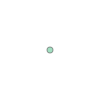

In [5]:
point1

正如我们在这里看到的，Jupyter 笔记本能够直接在屏幕上显示形状。

我们可以使用 print 语句来获取有关这些对象的实际定义的信息：

In [7]:
print(point1)
print(point3D)

POINT (2.2 4.2)
POINT Z (9.26 -2.456 0.57)


3D点可以从坐标前面的大写字母Z字母识别。

让我们也检查一个点的数据类型：

In [6]:
type(point1)

shapely.geometry.point.Point

我们可以看到，点的类型是形状点。点对象以基于以下[GEOS](https://trac.osgeo.org/geos)
C++库是各种地理信息系统背后的标准库之一。它在引擎盖下运行，例如在[QGIS](http://www.qgis.org/en/site/)

### 点属性和函数

点和其他形状对象具有有用的内置[属性和方法](https://shapely.readthedocs.io/en/stable/manual.html#general-attributes-and-methods)
例如，使用可用属性，我们可以提取点的坐标值并计算点之间的欧几里得距离。

In [8]:
dir(point1)

['__and__',
 '__array_interface__',
 '__bool__',
 '__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__geo_interface__',
 '__geom__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__p__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__weakref__',
 '__xor__',
 '_array_interface',
 '_array_interface_base',
 '_crs',
 '_ctypes',
 '_ctypes_data',
 '_empty',
 '_geom',
 '_get_coords',
 '_is_empty',
 '_lgeos',
 '_ndim',
 '_other_owned',
 '_repr_svg_',
 '_set_coords',
 '_set_geom',
 'almost_equals',
 'area',
 'array_interface',
 'array_interface_base',
 'boundary',
 'bounds',
 'buffer',
 'centroid',
 'contains',
 'convex_hull',
 'coords',
 'covered_by',
 'covers',
 'crosses',
 'ctypes',
 'difference',
 'disjoint',


`geom_type` 属性包含有关 Shapely 对象的几何类型的信息：

In [9]:
point1.geom_type

'Point'

提取点的坐标可以通过几种不同的方式完成：

`coords` 属性包含坐标信息作为 `CoordinateSequence` 这是与 Shapely 相关的另一种数据类型。

In [10]:
# Get xy coordinate tuple
list(point1.coords)

[(2.2, 4.2)]

这里我们在列表中有一个坐标元组。使用属性“x”和“y”可以直接将坐标作为纯十进制数获取。

In [11]:
# Read x and y coordinates separately
x = point1.x
y = point1.y

In [12]:
print( x, y)

2.2 4.2


也可以使用[距离](https://shapely.readthedocs.io/en/stable/manual.html#object.distance)方法计算两个物体之间的距离。在我们的示例中，距离是在笛卡尔坐标系中计算的。使用真实 GIS 数据时，距离基于使用的坐标参考系。始终检查所使用的坐标参考系统中的测量单位（例如，米）。

让我们计算一下 `point1` 和 `point2` 之间的距离：

In [13]:
# Check input data
print(point1)
print(point2)

POINT (2.2 4.2)
POINT (7.2 -25.1)


In [ ]:
# Calculate the distance between point1 and point2
dist = point1.distance(point2)

# Print out a nicely formatted info message
print(f"Distance between the points is {dist} units")

## LineString


创建 LineString -objects 与创建形状点非常相似。

现在，我们可以使用形状点对象列表或将点作为坐标元组传递，而不是使用单个坐标元组来构造线：

In [14]:
# Create a LineString from our Point objects
line = LineString([point1, point2, point3])

In [15]:
# It is also possible to produce the same outcome using coordinate tuples
line2 = LineString([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

In [16]:
# Check if lines are identical
line == line2 

True

Let's see how our line looks like: 

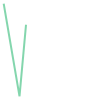

In [17]:
line

In [18]:
print(line)

LINESTRING (2.2 4.2, 7.2 -25.1, 9.26 -2.456)


从上面我们可以看到，`线`变量由多个坐标对组成。

还是检查数据类型：

In [19]:
# Check data type of the line object
type(line)

shapely.geometry.linestring.LineString

In [20]:
# Check geometry type of the line object
line.geom_type

'LineString'

### LineString 属性与函数


`LineString` -对象具有许多有用的内置属性和功能。例如，可以提取 LineString（线）的坐标或长度，计算线的质心，沿线创建特定距离的点，计算从线到指定点的最接近距离并简化几何形状。请参阅[形状文档](http://toblerity.org/shapely/manual.html)中的完整功能列表。在这里，我们介绍其中的一些。

我们可以像提取`点`一样提取线字符串的坐标

In [21]:
# Get xy coordinate tuples
list(line.coords)

[(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)]

同样，我们在列表中有一个坐标元组 （x，y） 列表。

如果您需要访问线的所有 x 坐标或所有 y 坐标，您可以直接使用 `xy`属性进行操作：

In [22]:
# Extract x and y coordinates separately
xcoords = list(line.xy[0])
ycoords = list(line.xy[1])

In [23]:
print(xcoords)
print(ycoords)

[2.2, 7.2, 9.26]
[4.2, -25.1, -2.456]


可以直接从 LineString 对象本身检索特定属性，例如线的长度和线的中心（质心）：

In [24]:
# Get the lenght of the line
l_length = line.length
print(f"Length of our line: {l_length} units")

Length of our line: 52.46106912939557 units


In [25]:
# Get the centroid of the line
print(line.centroid)

POINT (6.229961354035622 -11.89241115757239)


如你所见，线的质心又是一个形状点对象。

## Polygon


创建`多边形`对象继续创建`点`和`线字符串`的相同逻辑，但多边形对象只接受一系列坐标作为输入。

多边形需要**至少三个坐标元组**（三个点需要形成一个表面）：

In [26]:
# Create a Polygon from the coordinates
poly = Polygon([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

我们也可以使用之前创建的 Shapely Point 对象中的信息，但不能直接使用点对象。相反，我们需要以序列的形式获取 x，y 坐标对的信息。我们可以通过使用列表理解来实现这一点。

In [27]:
# Create a Polygon based on information from the Shapely points
poly2 = Polygon([[p.x, p.y] for p in [point1, point2, point3]])

为了理解刚刚发生的事情，让我们检查一下列表理解产生了什么：

In [28]:
[[p.x, p.y] for p in [point1, point2, point3]]

[[2.2, 4.2], [7.2, -25.1], [9.26, -2.456]]

此列表列表作为创建多边形的输入传递。

In [29]:
# Easier: Just add a list of point objects
poly3 = Polygon([point1, point2, point3])

In [30]:
# Check that polygon objects created using the different approaches are identical
print(poly == poly2)
print(poly == poly3)

True
True


让我们看看我们的多边形是什么样子的

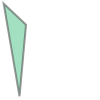

In [31]:
poly

In [32]:
print(poly)

POLYGON ((2.2 4.2, 7.2 -25.1, 9.26 -2.456, 2.2 4.2))


请注意，`多边形`表示在坐标周围有双括号（即`多边形（（<此处的值>））`）。这是因为多边形内部也可以有孔。

同样检查数据类型

In [33]:
# Data type
type(poly)

shapely.geometry.polygon.Polygon

In [34]:
# Geometry type
poly.geom_type

'Polygon'

In [35]:
# Check the help for Polygon objects:
help(Polygon)

Help on class Polygon in module shapely.geometry.polygon:

class Polygon(shapely.geometry.base.BaseGeometry)
 |  Polygon(shell=None, holes=None)
 |  
 |  A two-dimensional figure bounded by a linear ring
 |  
 |  A polygon has a non-zero area. It may have one or more negative-space
 |  "holes" which are also bounded by linear rings. If any rings cross each
 |  other, the feature is invalid and operations on it may fail.
 |  
 |  Attributes
 |  ----------
 |  exterior : LinearRing
 |      The ring which bounds the positive space of the polygon.
 |  interiors : sequence
 |      A sequence of rings which bound all existing holes.
 |  
 |  Method resolution order:
 |      Polygon
 |      shapely.geometry.base.BaseGeometry
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __eq__(self, other)
 |      Return self==value.
 |  
 |  __init__(self, shell=None, holes=None)
 |      Parameters
 |      ----------
 |      shell : sequence
 |          A sequence of (x, y [,z]) numeric coo



正如 [Polygon](https://shapely.readthedocs.io/en/stable/manual.html#polygons) -object 的帮助所表明的那样，可以使用外部坐标和内部坐标（可选）构造多边形，其中内部坐标在多边形内创建一个孔：


让我们看看如何创建一个带有孔的`多边形`：

In [36]:
# Define the outer border
border = [(-180, 90), (-180, -90), (180, -90), (180, 90)]

In [37]:
# Outer polygon
world = Polygon(shell=border)
print(world)

POLYGON ((-180 90, -180 -90, 180 -90, 180 90, -180 90))


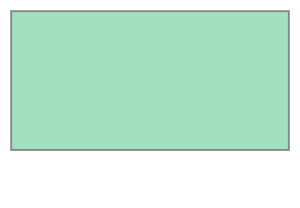

In [38]:
world

In [39]:
# Let's create a single big hole where we leave ten units at the boundaries
# Note: there could be multiple holes, so we need to provide list of coordinates for the hole inside a list
hole = [[(-170, 80), (-170, -80), (170, -80), (170, 80)]]

In [40]:
# Now we can construct our Polygon with the hole inside
frame = Polygon(shell=border, holes=hole)
print(frame)

POLYGON ((-180 90, -180 -90, 180 -90, 180 90, -180 90), (-170 80, -170 -80, 170 -80, 170 80, -170 80))


看看现在我们所拥有的

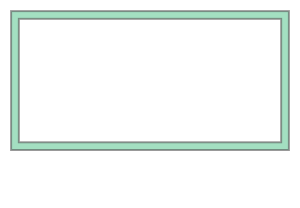

In [41]:
frame

正如我们所看到的，`多边形`现在有两个不同的坐标元组。第一个表示**外部**，第二个表示多边形内部的**孔**。

### Polygon 属性与函数


我们可以再次直接从“多边形”对象本身访问不同的属性，这对于许多分析非常有用，例如`面积`、`质心`、`边界框`、`外部`和`外部长度`。请参阅[形状用户手册](https://shapely.readthedocs.io/en/stable/manual.html#the-shapely-user-manua)中的完整方法列表。

在这里，我们可以看到一些可用的属性以及如何访问它们：

In [42]:
# Print the outputs
print(f"Polygon centroid: {world.centroid}")
print(f"Polygon Area: {world.area}")
print(f"Polygon Bounding Box: {world.bounds}")
print(f"Polygon Exterior: {world.exterior}")
print(f"Polygon Exterior Length: {world.exterior.length}")

Polygon centroid: POINT (-0 -0)
Polygon Area: 64800.0
Polygon Bounding Box: (-180.0, -90.0, 180.0, 90.0)
Polygon Exterior: LINEARRING (-180 90, -180 -90, 180 -90, 180 90, -180 90)
Polygon Exterior Length: 1080.0


正如我们在上面看到的，从“多边形”对象访问不同的属性也相当简单。请注意，当我们开始处理投影坐标系中的数据时，距离度量将更有意义。

## 几何集合


在某些情况下，在单个要素中存储多个几何（例如，多个点或多个面）非常有用。一个实际的例子是一个由几个岛屿组成的国家。在这种情况下，所有这些面在国家/地区级别上共享相同的属性，因此将该国家/地区存储为包含所有面的几何集合可能是合理的。然后，属性表将包含一行具有国家/地区级属性的信息，与这些属性相关的几何将表示多个面。

在 Shapely 中，点集合通过使用 MultiPoint 对象实现，曲线集合通过使用 MultiLineString 对象实现，曲面集合由 MultiPolygon 对象实现。

In [43]:
# Import constructors for creating geometry collections
from shapely.geometry import MultiPoint, MultiLineString, MultiPolygon

让我们从创建 MultiPoint 与 MultilineString 对象开始:

In [45]:
# Create a MultiPoint object of our points 1,2 and 3
multi_point = MultiPoint([point1, point2, point3])

# It is also possible to pass coordinate tuples inside
multi_point2 = MultiPoint([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

# We can also create a MultiLineString with two lines
line1 = LineString([point1, point2])
line2 = LineString([point2, point3])
multi_line = MultiLineString([line1, line2])

# Print object definitions
print(multi_point)
print(multi_line)

MULTIPOINT (2.2 4.2, 7.2 -25.1, 9.26 -2.456)
MULTILINESTRING ((2.2 4.2, 7.2 -25.1), (7.2 -25.1, 9.26 -2.456))


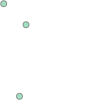

In [46]:
multi_point

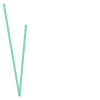

In [47]:
multi_line

多面以类似的方式构造。让我们通过组合两个代表西半球和东半球的单独多边形来为“世界”创建一个边界框。

In [48]:
# Let's create the exterior of the western part of the world
west_exterior = [(-180, 90), (-180, -90), (0, -90), (0, 90)]

# Let's create a hole --> remember there can be multiple holes, thus we need to have a list of hole(s). 
# Here we have just one.
west_hole = [[(-170, 80), (-170, -80), (-10, -80), (-10, 80)]]

# Create the Polygon
west_poly = Polygon(shell=west_exterior, holes=west_hole)

# Print object definition
print(west_poly)

POLYGON ((-180 90, -180 -90, 0 -90, 0 90, -180 90), (-170 80, -170 -80, -10 -80, -10 80, -170 80))


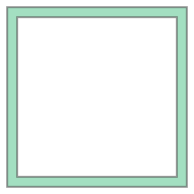

In [49]:
west_poly

Shapely 还有一个工具，用于根据最小和最大 x 和 y 坐标创建 [a bounding box](https://en.wikipedia.org/wiki/Minimum_bounding_box)。让我们使用 [box](https://shapely.readthedocs.io/en/stable/manual.html#shapely.geometry.box)构造函数来创建多边形，而不是使用 Polygon 构造函数： 

In [50]:
from shapely.geometry import box

In [51]:
# Specify the bbox extent (lower-left corner coordinates and upper-right corner coordinates)
min_x, min_y = 0, -90
max_x, max_y = 180, 90

# Create the polygon using Shapely
east_poly = box(minx=min_x, miny=min_y, maxx=max_x, maxy=max_y)

# Print object definition
print(east_poly)

POLYGON ((180 -90, 180 90, 0 90, 0 -90, 180 -90))


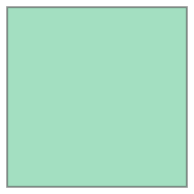

In [52]:
east_poly

最后，我们可以将两个多边形组合成一个多多边形：

In [53]:
# Let's create our MultiPolygon. We can pass multiple Polygon -objects into our MultiPolygon as a list
multi_poly = MultiPolygon([west_poly, east_poly])

# Print object definition
print(multi_poly)

MULTIPOLYGON (((-180 90, -180 -90, 0 -90, 0 90, -180 90), (-170 80, -170 -80, -10 -80, -10 80, -170 80)), ((180 -90, 180 90, 0 90, 0 -90, 180 -90)))


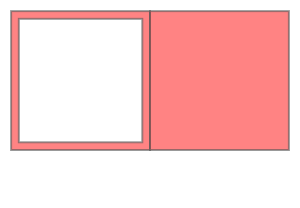

In [54]:
multi_poly

我们可以看到输出类似于我们之前创建的基本几何对象，但现在这些对象包含这些点、线或多边形的多个要素。

### Convex hull and envelope

凸包是指包含集合中所有对象的较小可能多边形。除了最小边界框外，凸包在描述数据范围时是一个有用的形状。 

让我们围绕multi_point对象创建一个凸包：

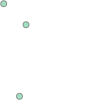

In [55]:
# Check input geometry
multi_point

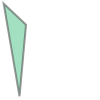

In [56]:
# Convex Hull (smallest polygon around the geometry collection)
multi_point.convex_hull

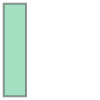

In [57]:
# Envelope (smalles rectangular polygon around the geometry collection): 
multi_point.envelope

### 其他有用的属性
几何集合的长度：

In [60]:
print(f"Number of objects in our MultiLine: {len(multi_line)}")
print(f"Number of objects in our MultiPolygon: {len(multi_poly)}")

Number of objects in our MultiLine: 2
Number of objects in our MultiPolygon: 2


C:\Users\24365\AppData\Local\Temp\ipykernel_22300\3917617097.py:1: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  print(f"Number of objects in our MultiLine: {len(multi_line)}")
C:\Users\24365\AppData\Local\Temp\ipykernel_22300\3917617097.py:2: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  print(f"Number of objects in our MultiPolygon: {len(multi_poly)}")


面积：

In [59]:
# Print outputs:
print(f"Area of our MultiPolygon: {multi_poly.area}")
print(f"Area of our Western Hemisphere polygon: {multi_poly[0].area}")

Area of our MultiPolygon: 39200.0
Area of our Western Hemisphere polygon: 6800.0


C:\Users\24365\AppData\Local\Temp\ipykernel_22300\498719857.py:3: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  print(f"Area of our Western Hemisphere polygon: {multi_poly[0].area}")


从上面我们可以看到，多边形具有与单个几何对象完全相同的属性，但现在诸如面积之类的信息计算了单个对象组合的**ALL**的面积。我们还可以使用索引访问几何集合中的各个对象。

最后，我们可以检查我们是否有“有效”的多多边形。如果各个多边形彼此不相交，则认为多面有效。
在这里，由于多边形具有共同的 0 子午线，因此我们不应该有一个有效的多边形。我们可以从 **is_valid** -属性中检查对象的有效性，该属性告诉多边形或线是否相互相交。在尝试从数据中查找拓扑错误时，这可能是非常有用的信息：

In [58]:
print(f"Is polygon valid?: {multi_poly.is_valid}")

Is polygon valid?: False
